<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Загрузим-данные-из-файла-и-изучим-их." data-toc-modified-id="Загрузим-данные-из-файла-и-изучим-их.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузим данные из файла и изучим их.</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Переведем-значения-признаков-в-классы." data-toc-modified-id="Переведем-значения-признаков-в-классы.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Переведем значения признаков в классы.</a></span></li><li><span><a href="#Подготовка-данных-для-использования-в-моделях." data-toc-modified-id="Подготовка-данных-для-использования-в-моделях.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Подготовка данных для использования в моделях.</a></span></li><li><span><a href="#Поиск-оптимальных-гиперпараметров-для-моделей-решающего-дерева,-случайного-леса-и-логистической-регрессии." data-toc-modified-id="Поиск-оптимальных-гиперпараметров-для-моделей-решающего-дерева,-случайного-леса-и-логистической-регрессии.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Поиск оптимальных гиперпараметров для моделей решающего дерева, случайного леса и логистической регрессии.</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Upsampling</a></span></li><li><span><a href="#Downsampling" data-toc-modified-id="Downsampling-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Downsampling</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

**Описание данных:**

Каждый объект в наборе данных - это информация о поведении клиентов банка. Нужно проанализитровать данные, и создать модель, которая сможет найти закономерности поведения клиентов, и предсказать их уход.

**Известные данные:**
- **RowNumber** — индекс строки в данных;
- **CustomerId** — уникальный идентификатор клиента;
- **Surname** — фамилия;
- **CreditScore** — кредитный рейтинг;
- **Geography** — страна проживания;
- **Gender** — пол;
- **Age** — возраст;
- **Tenure** — сколько лет человек является клиентом банка;
- **Balance** — баланс на счёте;
- **NumOfProducts** — количество продуктов банка, используемых клиентом;
- **HasCrCard** — наличие кредитной карты;
- **IsActiveMembe**r — активность клиента;
- **EstimatedSalary** — предполагаемая зарплата.

**Целевой признак:**
- **Exited** — факт ухода клиента.


### Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.metrics import (
accuracy_score,
recall_score,
precision_score,
f1_score,
roc_auc_score,
roc_curve
)
pd.options.mode.chained_assignment = None
from sklearn.dummy import DummyClassifier
import warnings
warnings.filterwarnings('ignore')
#!pip install scikit-learn==1.1.3

### Загрузим данные из файла и изучим их.

In [2]:
try:
    data = pd.read_csv('/datasets/Churn.csv')
except:
    data = pd.read_csv('Churn.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


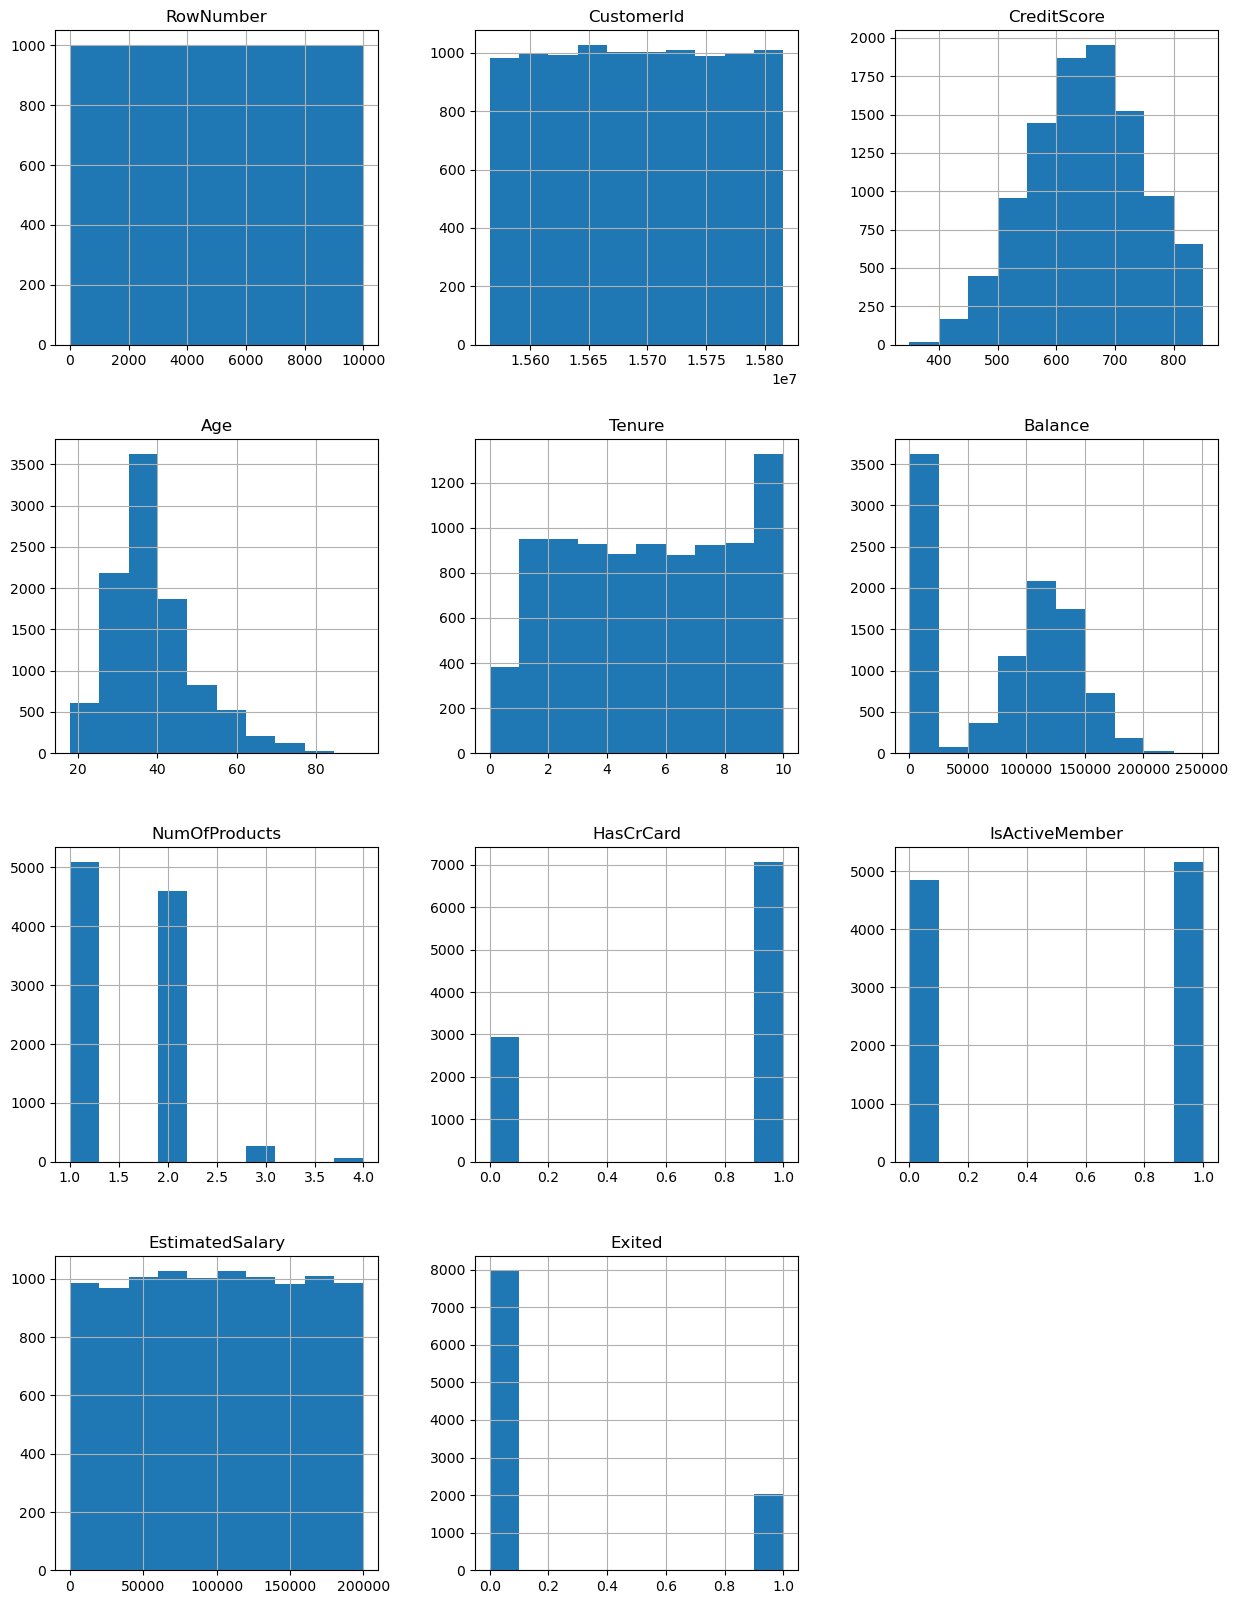

In [5]:
data.hist(figsize=(15, 20));

Файл был успешно загружен и просмотрен на наличие ошибок. Все показатели соответсвуют ожидаемым значениям признаков, типы данных не имеют ошибок. В столбце Tenure мы имеем пропуски данных около 10%, что представляет собой достаточно большой пласт общего датасета, поэтому убрать данные позиции будет ошибкой. Согласно гистограммам, мы можем привести пропуски в столбце Tenure к медиане. Основная масса записей людей по годам примерно одинаковая и не имеет больших искажений, кроме тех кто работает с банком около 10 лет. дополнительно Tenure переведем в формат int, так как "стаж" клиента определяется круглым значением года. Так же столбцы RowNumber, CustomerId, Surname — стоит удалить, так как они не несут значений, которые как либо должны повлиять на целевой признак. Фамилия, номер и индекс никак с этим не связаны.

In [6]:
data['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

In [7]:
median_type = data['Tenure'].median()
data['Tenure'] = data['Tenure'].fillna(median_type)

In [8]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [9]:
data['Tenure'] = data['Tenure'].astype('int64')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


**Вывод:** Таблица была исправлена и подготовлена для дальнейшей работы.

## Исследование задачи

###  Переведем значения признаков в классы.

**Разделим признаки на категориальные и количественные типы:**

**Категориальные** - Geography, Gender.

**Количественные** - Age, Tenure, Balance, NumOfProducts, EstimatedSalary, CreditScore, HasCrCard, IsActiveMember, Exited.

**Переведем категориальные признаки в численные с помощью прямого кодировниая OHE:**

In [11]:
data = pd.get_dummies(data, drop_first=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


### Подготовка данных для использования в моделях.

**Разделение данных на целевой и остальные признаки:**

In [13]:
features = data.drop('Exited', axis=1)
target = data['Exited']

**Разделение основной выборки на тренировочную, тестовую и валидационную:**

In [14]:
features, features_test, target, target_test = train_test_split(features, target, test_size=0.2, random_state=12345, stratify=target)
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.2, random_state=12345)

In [15]:
print('Распределение:')
print('features_test:', features_test.shape, 'features_valid:', features_valid.shape, 'features_train:', features_train.shape)

Распределение:
features_test: (2000, 11) features_valid: (1600, 11) features_train: (6400, 11)


**Проверим баланс классов на полученных данных после кодировки:**

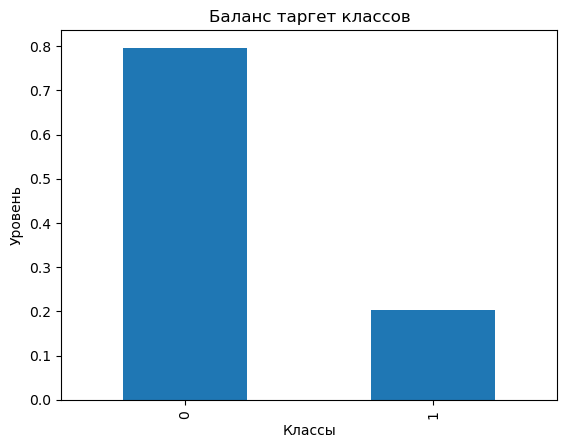

In [16]:
class_balance = data['Exited'].value_counts(normalize=True)
class_balance.plot(kind='bar');
plt.title('Баланс таргет классов');
plt.ylabel('Уровень');
plt.xlabel('Классы');

**Вывод:** Мы наблюдаем перевес классов в пользу нулевых значений. К исправлению этой проблемы мы вернемся позже, а сейчас построим модели и найдем для них оптимальные параметры. 

### Поиск оптимальных гиперпараметров для моделей решающего дерева, случайного леса и логистической регрессии. 

**Модель решающего дерева:**

Обучим модель без учета баланса с гиперпараметрами: max_depth, min_samples_split, min_samples_leaf.

Для моделей проведем оценки с помощью метрик: accuracy_score, recall, precisionm и F1.

In [17]:
%%time
best_accuracy = 0
best_recall = 0
best_precisionm = 0
best_f1 = 0
best_depth = 0
for max_depth in tqdm(range(2, 15)):
    for min_samples_split in range(2, 8):
        for min_samples_leaf in range(2, 8):
            model_tree = DecisionTreeClassifier(random_state=12345, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
            model_tree.fit(features_train, target_train)
            predictions_valid_tree = model_tree.predict(features_valid)
            
            accuracy_result_tree = accuracy_score(target_valid, predictions_valid_tree)
            
            recall_result_tree = recall_score(target_valid, predictions_valid_tree)
            
            precision_result_tree = precision_score(target_valid, predictions_valid_tree)
            
            f1_result_tree = f1_score(target_valid, predictions_valid_tree)

            
            if accuracy_result_tree > best_accuracy:
                best_parameter = [max_depth, min_samples_split, min_samples_leaf]
                best_accuracy = accuracy_result_tree
               

            if recall_result_tree > best_recall:
                best_parameter_1 = [max_depth, min_samples_split, min_samples_leaf]
                best_recall = recall_result_tree
                
                
            if precision_result_tree > best_precisionm:
                best_parameter_2 = [max_depth, min_samples_split, min_samples_leaf]
                best_precisionm = precision_result_tree
            
            
            if f1_result_tree > best_f1:
                best_parameter_3 = [max_depth, min_samples_split, min_samples_leaf]
                best_f1 = f1_result_tree
                
                
print('Аccuracy_Score:', best_accuracy) 
print('Гиперпараметры модели:')
print('max_depth:', best_parameter[0]) 
print('min_samples_split:', best_parameter[1])
print('min_samples_leaf:', best_parameter[2])                 
print('\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\')                                
print('Recall:', best_recall) 
print('Гиперпараметры модели:')
print('max_depth:', best_parameter_1[0]) 
print('min_samples_split:', best_parameter_1[1])
print('min_samples_leaf:', best_parameter_1[2])
print('\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\')
print('Precisionm:', best_precisionm) 
print('Гиперпараметры модели:')
print('max_depth:', best_parameter_2[0]) 
print('min_samples_split:', best_parameter_2[1])
print('min_samples_leaf:', best_parameter_2[2])
print('\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\')
print('F1:', best_f1) 
print('Гиперпараметры модели:')
print('max_depth:', best_parameter_3[0]) 
print('min_samples_split:', best_parameter_3[1])
print('min_samples_leaf:', best_parameter_3[2])  
print('\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\')

100%|██████████| 13/13 [00:07<00:00,  1.64it/s]

Аccuracy_Score: 0.85375
Гиперпараметры модели:
max_depth: 7
min_samples_split: 2
min_samples_leaf: 7
\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
Recall: 0.45180722891566266
Гиперпараметры модели:
max_depth: 13
min_samples_split: 7
min_samples_leaf: 3
\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
Precisionm: 0.8026315789473685
Гиперпараметры модели:
max_depth: 6
min_samples_split: 2
min_samples_leaf: 6
\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
F1: 0.5568181818181819
Гиперпараметры модели:
max_depth: 8
min_samples_split: 2
min_samples_leaf: 5
\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
Wall time: 7.94 s


**Оптимальные гиперпараметры для модели решающего дерева:**

**Аccuracy_Score:** 0.85375\
**Гиперпараметры модели:**\
**max_depth:** 7\
**min_samples_split:** 2\
**min_samples_leaf:** 7

**Параметры согласно F1 - метрики:**

**F1:** 0.5551330798479087\
**Гиперпараметры модели:**\
**max_depth:** 8\
**min_samples_split:** 2\
**min_samples_leaf:** 5\
**Wall time:** 8.42 s

**Модель случайного леса:**

In [18]:
%%time
best_accuracy = 0
best_recall = 0
best_precisionm = 0
best_f1 = 0
best_n_estimators = 0
best_depth = 0

for n_estimators in tqdm(range(1, 10)):
    for max_depth in range(2, 15):
        for min_samples_split in range(2, 6):
            for min_samples_leaf in range(2, 6):
                model_tree = RandomForestClassifier(random_state=12345, n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
                model_tree.fit(features_train, target_train)
                predictions_valid_tree = model_tree.predict(features_valid)
                
                accuracy_result_tree = accuracy_score(target_valid, predictions_valid_tree)
                
                recall_result_tree = recall_score(target_valid, predictions_valid_tree)
                
                precision_result_tree = precision_score(target_valid, predictions_valid_tree)
                
                f1_result_tree = f1_score(target_valid, predictions_valid_tree)
                
                
                
                if accuracy_result_tree > best_accuracy:
                    best_parameter = [n_estimators, max_depth, min_samples_split, min_samples_leaf]
                    best_accuracy = accuracy_result_tree
                    
                if recall_result_tree > best_recall:
                    best_parameter_1 = [n_estimators, max_depth, min_samples_split, min_samples_leaf]
                    best_recall = recall_result_tree
                    
                if precision_result_tree > best_precisionm:
                    best_parameter_2 = [n_estimators, max_depth, min_samples_split, min_samples_leaf]
                    best_precisionm = precision_result_tree
                    
                if f1_result_tree > best_f1:
                    best_parameter_3 = [n_estimators, max_depth, min_samples_split, min_samples_leaf]
                    best_f1 = f1_result_tree
                
                
print('Аccuracy_Score:', best_accuracy) 
print('Гиперпараметры модели:')
print('n_estimators:', best_parameter[0])
print('max_depth:', best_parameter[1]) 
print('min_samples_split:', best_parameter[2])
print('min_samples_leaf:', best_parameter[3])                 
print('\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\')                                
print('Recall:', best_recall) 
print('Гиперпараметры модели:')
print('n_estimators:', best_parameter_1[0])
print('max_depth:', best_parameter_1[1]) 
print('min_samples_split:', best_parameter_1[2])
print('min_samples_leaf:', best_parameter_1[3])
print('\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\')
print('Precisionm:', best_precisionm) 
print('Гиперпараметры модели:')
print('n_estimators:', best_parameter_2[0])
print('max_depth:', best_parameter_2[1]) 
print('min_samples_split:', best_parameter_2[2])
print('min_samples_leaf:', best_parameter_2[3])
print('\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\')
print('F1:', best_f1) 
print('Гиперпараметры модели:')
print('n_estimators:', best_parameter_3[0])
print('max_depth:', best_parameter_3[1]) 
print('min_samples_split:', best_parameter_3[2])
print('min_samples_leaf:', best_parameter_3[3])
print('\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\')

100%|██████████| 9/9 [00:43<00:00,  4.80s/it]

Аccuracy_Score: 0.861875
Гиперпараметры модели:
n_estimators: 7
max_depth: 13
min_samples_split: 2
min_samples_leaf: 5
\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
Recall: 0.4939759036144578
Гиперпараметры модели:
n_estimators: 1
max_depth: 8
min_samples_split: 2
min_samples_leaf: 4
\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
Precisionm: 1.0
Гиперпараметры модели:
n_estimators: 3
max_depth: 2
min_samples_split: 2
min_samples_leaf: 2
\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
F1: 0.585820895522388
Гиперпараметры модели:
n_estimators: 2
max_depth: 8
min_samples_split: 2
min_samples_leaf: 3
\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
Wall time: 43.2 s


**Оптимальные гиперпараметры для модели случайного леса:**

**Аccuracy_Score:** 0.86125\
**Гиперпараметры модели:**\
**n_estimators:** 4\
**max_depth:** 5\
**min_samples_split:** 2\
**min_samples_leaf:** 2

**Параметры согласно F1 - метрики:**

**F1:** 0.587360594795539\
**Гиперпараметры модели:**\
**n_estimators:** 4\
**max_depth:** 11\
**min_samples_split:** 2\
**min_samples_leaf:** 4\
**Wall time:** 41 s

**Модель логической регрессии:**

In [19]:
%%time
best_accuracy = 0
best_recall = 0
best_precisionm = 0
best_f1 = 0
max_iter=1500
model_log_reg = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=max_iter)
model_log_reg.fit(features_train, target_train)
predictions_valid_tree = model_log_reg.predict(features_valid)

accuracy_result_tree = accuracy_score(target_valid, predictions_valid_tree)
       
recall_result_tree = recall_score(target_valid, predictions_valid_tree)
                
precision_result_tree = precision_score(target_valid, predictions_valid_tree)
                
f1_result_tree = f1_score(target_valid, predictions_valid_tree)


if accuracy_result_tree > best_accuracy:
    
    best_accuracy = accuracy_result_tree
               
if recall_result_tree > best_recall:
    
    best_recall = recall_result_tree
                
if precision_result_tree > best_precisionm:
    
    best_precisionm = precision_result_tree
            
if f1_result_tree > best_f1:
   
    best_f1 = f1_result_tree
    
                
print('Аccuracy_Score:', best_accuracy) 
print('Гиперпараметры модели:')
print('max_iter:', max_iter)                 
print('\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\')                                
print('Recall:', best_recall) 
print('Гиперпараметры модели:')
print('max_iter:', max_iter) 
print('\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\')
print('Precisionm:', best_precisionm) 
print('Гиперпараметры модели:')
print('max_iter:', max_iter) 
print('\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\')
print('F1:', best_f1) 
print('Гиперпараметры модели:')
print('max_iter:', max_iter)
print('\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\')

Аccuracy_Score: 0.794375
Гиперпараметры модели:
max_iter: 1500
\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
Recall: 0.05421686746987952
Гиперпараметры модели:
max_iter: 1500
\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
Precisionm: 0.5454545454545454
Гиперпараметры модели:
max_iter: 1500
\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
F1: 0.09863013698630137
Гиперпараметры модели:
max_iter: 1500
\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
Wall time: 30 ms


**Оптимальные гиперпараметры для модели логической регрессии:**

**Аccuracy_Score:** 0.794375\
**Гиперпараметры модели:**\
**max_iter:** 1500

**Параметры согласно F1 - метрики:**

**F1:** 0.09863013698630137\
**Гиперпараметры модели:**\
**max_iter:** 1500

По итогам исследования, лучшие показатели метрик имеет модель случайного леса. Стоит построить тестовую модель именно на этом типе, с полученными гиперпараметрами:

**F1:** 0.587360594795539\
**Гиперпараметры модели:**\
**n_estimators:** 4\
**max_depth:** 11\
**min_samples_split:** 2\
**min_samples_leaf:** 4\
**Wall time:** 41 s

Метрики по тестовой модели
Accuracy: 0.86
Recall: 0.48
Precision 0.72
F1 0.58


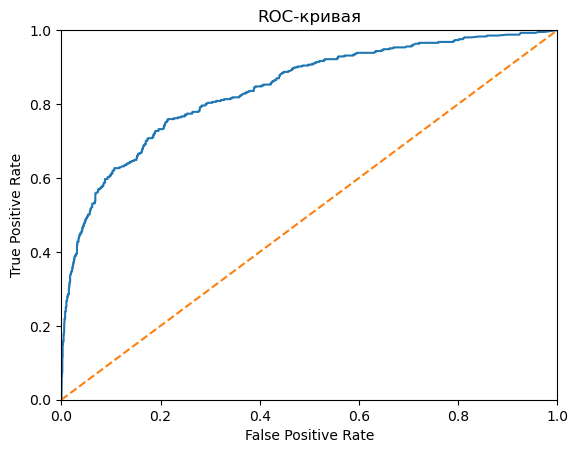

Площадь Roc кривой:
Auc_roc: 0.8403033233541708
Wall time: 111 ms


In [20]:
%%time
model_forest_test = RandomForestClassifier(random_state=12345, n_estimators=4, max_depth=11, min_samples_split=2, min_samples_leaf=4)
model_forest_test.fit(features, target)
predictions_test = model_forest_test.predict(features_test)

accuracy_test = accuracy_score(target_test, predictions_test)
recall_test = recall_score(target_test, predictions_test)
precision_test = precision_score(target_test, predictions_test)
f1_test = f1_score(target_test, predictions_test)

print('Метрики по тестовой модели')
print('Accuracy:', accuracy_test.round(2))
print('Recall:', recall_test.round(2))
print('Precision', precision_test.round(2))
print('F1', f1_test.round(2))


probabilities_test = model_forest_test.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
 
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('Площадь Roc кривой:')
print('Auc_roc:', auc_roc)

**Вывод:** Было проведено исследования, в рамках которого мы искали подходящую модель, и оптимальные гиперпараметры для нее. На полученных исходных была бучена тестовая модель с точностью равной 0.84, значением F1 равной 0.53 и auc_roc равной 0.82. Из полученных метрик можно сделать вывод о том, что модель достаточно точна, с большим уровеним истинно положительных ответов с малым количеством случайностей. Но в целом модель построена на неравномерных данных, от чего следует, что ее качество может быть значительно выше. 

## Борьба с дисбалансом

Соотношение значений целевого признака 5:1 (для классов 0 и 1 соответственно)
Для борьбы с дисбалансом классов применим несколько методов:
- взвешивание классов (class_weight='balanced');
- увеличение выборки положительного класса (Upsampling);
- уменьшение выборки отрицательного класса (sampling);

### Взвешивание классов

**Проведем исследование и найдем самую оптимальную модель с использованием параметра class_weight:**

Модель решающего дерева:

In [21]:
%%time
best_f1 = 0
best_depth = 0
for max_depth in tqdm(range(2, 15)):
    for min_samples_split in range(2, 8):
        for min_samples_leaf in range(2, 8):
            model_tree = DecisionTreeClassifier(random_state=12345, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, class_weight = 'balanced')
            model_tree.fit(features_train, target_train)
            predictions_valid_tree = model_tree.predict(features_valid)
            
            f1_result_tree = f1_score(target_valid, predictions_valid_tree)

            if f1_result_tree > best_f1:
                best_parameter = [max_depth, min_samples_split, min_samples_leaf]
                best_f1 = f1_result_tree
                
print('F1:', best_f1) 
print('Гиперпараметры модели:')
print('max_depth:', best_parameter[0]) 
print('min_samples_split:', best_parameter[1])
print('min_samples_leaf:', best_parameter[2])  
print('\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\')

100%|██████████| 13/13 [00:07<00:00,  1.73it/s]

F1: 0.6210392902408112
Гиперпараметры модели:
max_depth: 6
min_samples_split: 2
min_samples_leaf: 4
\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
Wall time: 7.53 s


Модель случайного леса:

In [22]:
%%time
best_f1 = 0
best_n_estimators = 0
best_depth = 0

for n_estimators in tqdm(range(1, 10)):
    for max_depth in range(2, 15):
        for min_samples_split in range(2, 6):
            for min_samples_leaf in range(2, 6):
                model_tree = RandomForestClassifier(random_state=12345, n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, class_weight = 'balanced')
                model_tree.fit(features_train, target_train)
                predictions_valid_tree = model_tree.predict(features_valid)
                
                f1_result_tree = f1_score(target_valid, predictions_valid_tree)
                
                if f1_result_tree > best_f1:
                    best_parameter = [n_estimators, max_depth, min_samples_split, min_samples_leaf]
                    best_f1 = f1_result_tree
                
print('F1:', best_f1) 
print('Гиперпараметры модели:')
print('n_estimators:', best_parameter[0])
print('max_depth:', best_parameter[1]) 
print('min_samples_split:', best_parameter[2])
print('min_samples_leaf:', best_parameter[3])
print('\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\')

100%|██████████| 9/9 [00:43<00:00,  4.78s/it]

F1: 0.6424418604651162
Гиперпараметры модели:
n_estimators: 7
max_depth: 9
min_samples_split: 2
min_samples_leaf: 3
\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
Wall time: 43 s


Модель логической регрессии:

In [23]:
%%time
best_f1 = 0
max_iter=1500
model_log_reg = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=max_iter, class_weight = 'balanced')
model_log_reg.fit(features_train, target_train)
predictions_valid_tree = model_log_reg.predict(features_valid)

f1_result_tree = f1_score(target_valid, predictions_valid_tree)

if f1_result_tree > best_f1:
   
    best_f1 = f1_result_tree
    
print('F1:', best_f1) 
print('Гиперпараметры модели:')
print('max_iter:', max_iter)
print('\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\')

F1: 0.45702730030333666
Гиперпараметры модели:
max_iter: 1500
\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
Wall time: 27 ms


По итогам исследования, лучшие показатели метрик имеет модель случайного леса. Стоит построить тестовую модель именно на этом типе, с полученными гиперпараметрами:

**F1:** 0.6424418604651162\
**Гиперпараметры модели:**\
**n_estimators:** 7\
**max_depth:** 9\
**min_samples_split:** 2\
**min_samples_leaf:** 3

Модель случайного леса вновь осталась лучшей, но в данном случае мы получили прирост **F1** метрики на 4-6% в моделях дерева и леса соотв. 

### Upsampling

**Создадим функцию для увеличения выборки:**

In [24]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

In [25]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

model_upsampled = RandomForestClassifier(random_state=12345, n_estimators=7, max_depth=9, min_samples_split=2, min_samples_leaf=3)
model_upsampled.fit(features_upsampled, target_upsampled)
predicted_valid_upsampled = model_upsampled.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid_upsampled))

F1: 0.6232439335887612


### Downsampling

**Создадим функцию для уменьшения выборки:**

In [26]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled

In [27]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

model_downsample = RandomForestClassifier(random_state=12345, n_estimators=7, max_depth=9, min_samples_split=2, min_samples_leaf=3)
model_downsample.fit(features_downsampled, target_downsampled)
predicted_valid_downsample = model_downsample.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid_downsample))

F1: 0.5763888888888888


**Вывод:** Лучший результат для модели, показывает метод Balanced, который повышает значение метрики F1 до 0.64.

## Тестирование модели

**Проведем тестировние модели случайного леса с оптимальными гиперпараметрами, и с предварительным балансированием классов с помощью метода upsampling:**

In [28]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

In [29]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

model_upsampled = RandomForestClassifier(random_state=12345, n_estimators=7, max_depth=9, min_samples_split=2, min_samples_leaf=3)
model_upsampled.fit(features_upsampled, target_upsampled)
predicted_test = model_upsampled.predict(features_test)
r = recall_result_balanced = recall_score(target_test, predictions_test)

print('Recall', r)
print("F1:", f1_score(target_test, predicted_test))

Recall 0.48157248157248156
F1: 0.6136595310907238


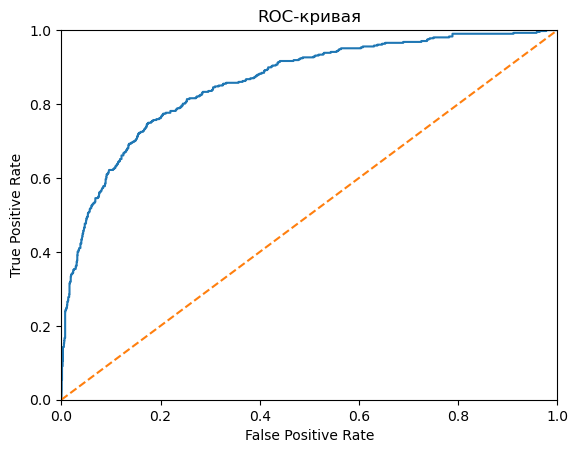

Площадь Roc кривой:
Auc_roc: 0.8581686463042395


In [30]:
probabilities_upsampled_test = model_upsampled.predict_proba(features_test)
probabilities_one_upsampled_test = probabilities_upsampled_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_upsampled_test)
 
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

auc_roc_upsampled_test = roc_auc_score(target_test, probabilities_one_upsampled_test)
print('Площадь Roc кривой:')
print('Auc_roc:', auc_roc_upsampled_test)

In [31]:
dummy_model = DummyClassifier(strategy='constant', constant=1)
dummy_model.fit(features_train, target_train)
dummy = dummy_model.score(features_train, target_train)
dummy_f1 = f1_score(dummy_model.predict(features_test), target_test)

print('Константная модель:')
print(dummy)
print('Константная модель по F1 мере:')
print(dummy_f1)

Константная модель:
0.2028125
Константная модель по F1 мере:
0.3381803074366431


**Вывод:** Была проведена работа над поиском подходящей модели и оптимальных для нее гиперпараметров. Изначальный датасет был исследован и зачищен от лишних данных, которые не влияют на сам процесс обучения. Признаки, которые могли бы вызвать затруднения в дальшейшей работе, были закодированы в соотв. значениям классы. Исследования в поиске модели показали оптимальный вариант - **RFC c параметрами: n_estimators - 7, max_depth - 9, min_samples_split - 2, min_samples_leaf - 3.**

Прогон модели по тестовой выборке показал приемлемые результаты: 

**- Accuracy: 0.86**\
**- F1 0.58**

Проведя исследование в балансировке данных, метод **balanced** показал лучшее значение **F1** = 0.64 на валидной выборке, но хуже чем **upsampling** на тестовой. Поэтому была выбран метон **upsampling**, который показал результат **F1** равный 0.61 на тестовой выборке. 

Показатель **AUC-ROC** показывает хороший уровень истинных ответов и общей адекватности модели рывный 0.85.

Показатель **Recall** также достаточно высок = 0.72. Это говорит о том, что модель хорошо ищет положительные объекты в модели.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*